In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
# Read dataset for covid19 vaccine
df_vaccine = pd.read_csv("/Users/atalwar/Desktop/aefi.csv")
df_vaccine.head()

,date,vaxtype,daily_total,daily_serious_npra,daily_nonserious,daily_nonserious_npra,daily_nonserious_mysj_dose1,daily_nonserious_mysj_dose2,d1_site_pain,d1_site_swelling,...,d2_site_redness,d2_tiredness,d2_headache,d2_muscle_pain,d2_joint_pain,d2_weakness,d2_fever,d2_vomiting,d2_chills,d2_rash
0,2021-01-13,astrazeneca,5,0,5,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-25,pfizer,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-26,pfizer,2,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-02-27,pfizer,4,0,4,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-02-28,pfizer,12,1,11,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_vaccine.dtypes

date                           object
vaxtype                        object
daily_total                     int64
daily_serious_npra              int64
daily_nonserious                int64
daily_nonserious_npra           int64
daily_nonserious_mysj_dose1     int64
daily_nonserious_mysj_dose2     int64
d1_site_pain                    int64
d1_site_swelling                int64
d1_site_redness                 int64
d1_tiredness                    int64
d1_headache                     int64
d1_muscle_pain                  int64
d1_joint_pain                   int64
d1_weakness                     int64
d1_fever                        int64
d1_vomiting                     int64
d1_chills                       int64
d1_rash                         int64
d2_site_pain                    int64
d2_site_swelling                int64
d2_site_redness                 int64
d2_tiredness                    int64
d2_headache                     int64
d2_muscle_pain                  int64
d2_joint_pai

In [6]:
# convert date type from object to datetime format
df_vaccine['date'] = pd.to_datetime(df_vaccine['date'],format='%Y-%m-%d')
df_vaccine.dtypes

date                           datetime64[ns]
vaxtype                                object
daily_total                             int64
daily_serious_npra                      int64
daily_nonserious                        int64
daily_nonserious_npra                   int64
daily_nonserious_mysj_dose1             int64
daily_nonserious_mysj_dose2             int64
d1_site_pain                            int64
d1_site_swelling                        int64
d1_site_redness                         int64
d1_tiredness                            int64
d1_headache                             int64
d1_muscle_pain                          int64
d1_joint_pain                           int64
d1_weakness                             int64
d1_fever                                int64
d1_vomiting                             int64
d1_chills                               int64
d1_rash                                 int64
d2_site_pain                            int64
d2_site_swelling                  

In [7]:
#Filter the dates
df = df_vaccine.loc[(df_vaccine['date']>='2021-05-05') & (df_vaccine['date']<='2021-10-31')]
filtered_data = df.to_csv("/Users/atalwar/Desktop/aefi_date.csv", index = None)

In [8]:
df = pd.read_csv("/Users/atalwar/Desktop/aefi_date.csv")

In [9]:
# Drop columns which are not needed
df= df.drop(df.columns[3:6], axis = 1)
df.head()

,date,vaxtype,daily_total,daily_nonserious_mysj_dose1,daily_nonserious_mysj_dose2,d1_site_pain,d1_site_swelling,d1_site_redness,d1_tiredness,d1_headache,...,d2_site_redness,d2_tiredness,d2_headache,d2_muscle_pain,d2_joint_pain,d2_weakness,d2_fever,d2_vomiting,d2_chills,d2_rash
0,2021-05-05,astrazeneca,139,139,0,76,7,2,73,62,...,0,0,0,0,0,0,0,0,0,0
1,2021-05-05,pfizer,3901,2017,1787,1517,450,127,974,759,...,111,867,679,503,266,481,216,228,199,80
2,2021-05-05,sinovac,424,256,160,119,12,6,129,101,...,5,89,65,33,28,55,18,24,15,9
3,2021-05-06,astrazeneca,95,94,0,52,7,2,71,37,...,0,0,0,0,0,0,0,0,0,0
4,2021-05-06,pfizer,2311,1186,1012,898,256,72,586,434,...,63,509,364,324,161,287,183,135,170,42


New Dataset is ready which is to be used for analysis. 26 columns * 540 rows

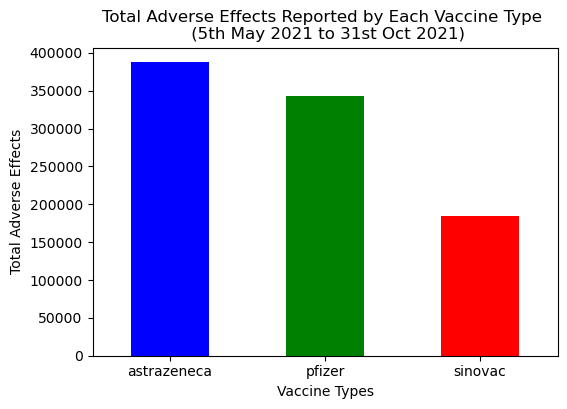

In [10]:
# Total adverse effects of each vaccine over a period of 6 months

total_effects = df.groupby('vaxtype')['daily_total'].sum()

plt.figure(figsize=(6,4))
total_effects.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Total Adverse Effects Reported by Each Vaccine Type \n (5th May 2021 to 31st Oct 2021)')
plt.xlabel('Vaccine Types')
plt.ylabel('Total Adverse Effects')
plt.xticks(rotation=0)
plt.show()

In [11]:
# compare this to total no of vaccines administered during this period. Need total dose administrted data
df_total_vaccine = pd.read_csv("/Users/atalwar/Desktop/vax_malaysia.csv")

#change datetime format
df_total_vaccine['date'] = pd.to_datetime(df_total_vaccine['date'],format='%Y-%m-%d')

#filter the dates
df_total_dose_date = df_total_vaccine.loc[(df_total_vaccine['date']>='2021-05-05') & (df_total_vaccine['date']<='2021-10-31')]
filtered_total_dose_data = df_total_dose_date.to_csv("/Users/atalwar/Desktop/vax_malaysia_date.csv", index = None)
df_total_dose_date = pd.read_csv("/Users/atalwar/Desktop/vax_malaysia_date.csv")
total_doses = df_total_dose_date['daily'].sum()
total_doses


49127497

In [21]:
effects = df['daily_total'].sum()
effects

915204

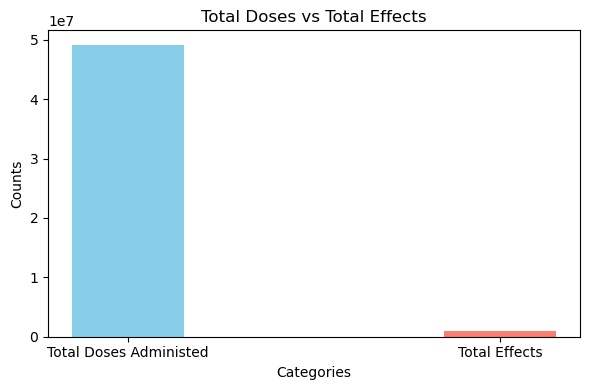

In [26]:
categories = ['Total Doses Administed', 'Total Effects']
values = [total_doses, effects]

plt.figure(figsize=(6,4))
plt.bar(categories, values, color=['skyblue', 'salmon'], width = 0.3)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Total Doses vs Total Effects')
plt.tight_layout()
plt.show()


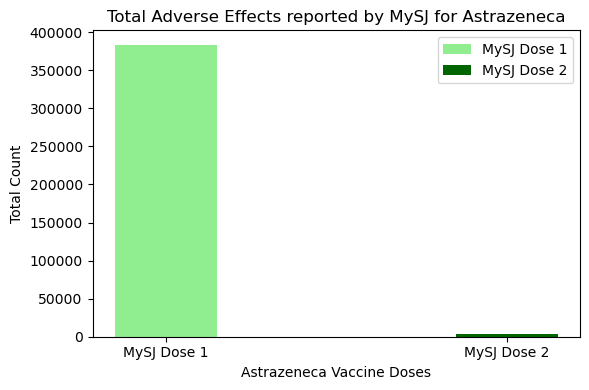

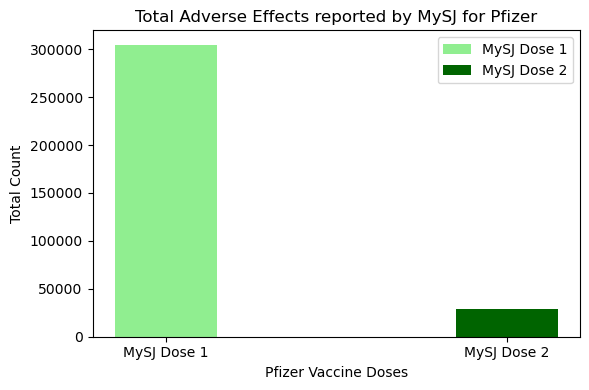

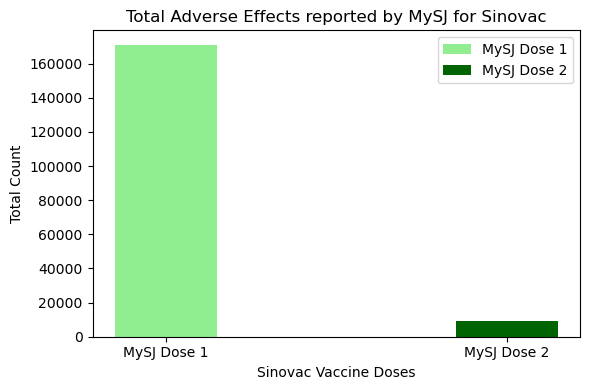

In [17]:
# each vaccine adverse effects after dose1 and dose2 . Reported by MySJ 
astrazeneca_data = df[df['vaxtype'] == 'astrazeneca']
pfizer_data = df[df['vaxtype'] == 'pfizer']
sinovac_data = df[df['vaxtype'] == 'sinovac']

def plot_vaccine_bargraph(data, vaccine_name):
    total_counts = data[['daily_nonserious_mysj_dose1', 'daily_nonserious_mysj_dose2']].sum()
    plt.figure(figsize=(6,4))
    plt.bar(['MySJ Dose 1', 'MySJ Dose 2'], total_counts, color=['lightgreen', 'darkgreen'],
            width=0.3, label = ['MySJ Dose 1','MySJ Dose 2'])
    plt.title(f'Total Adverse Effects reported by MySJ for {vaccine_name}')
    plt.xlabel(f'{vaccine_name} Vaccine Doses')
    plt.ylabel('Total Count')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_vaccine_bargraph(astrazeneca_data, 'Astrazeneca')
plot_vaccine_bargraph(pfizer_data, 'Pfizer')
plot_vaccine_bargraph(sinovac_data,'Sinovac')

In [ ]:
#Descriptive Stats
def descriptive_stats(data, vaccine_name):
    mean_values = data.mean()
    median_values = data.median()
    std_dev_values = data.std()
    return mean_values, median_values, std_dev_values

def stats_bar_graph(mean_values, median_values, std_dev_values, vaccine_name):
    labels = ['Dose 1', 'Dose 2']
    x = range(len(labels))

    plt.figure(figsize=(6,4))
    plt.bar(x, mean_values, width=0.2, label='Mean', align='center')
    plt.bar([i + 0.2 for i in x], median_values, width=0.2, label='Median', align='center')
    plt.bar([i + 0.4 for i in x], std_dev_values, width=0.2, label='Standard Deviation', align='center')

    plt.xlabel('Vaccine Doses')
    plt.ylabel('Values')
    plt.title(f'Statistics for Adverse Effects by Dose for {vaccine_name}')
    plt.xticks([i + 0.2 for i in x], labels)
    plt.legend()
    plt.tight_layout()
    plt.show()

astrazeneca_stats = descriptive_stats(astrazeneca_data[['daily_nonserious_mysj_dose1',
                                                        'daily_nonserious_mysj_dose2']], 'Astrazeneca')
pfizer_stats = descriptive_stats(pfizer_data[['daily_nonserious_mysj_dose1', 
                                              'daily_nonserious_mysj_dose2']], 'Pfizer')
sinovac_stats = descriptive_stats(sinovac_data[['daily_nonserious_mysj_dose1', 
                                                'daily_nonserious_mysj_dose2']], 'Sinovac')

stats_bar_graph(*astrazeneca_stats, 'Astrazeneca')
stats_bar_graph(*pfizer_stats, 'Pfizer')
stats_bar_graph(*sinovac_stats, 'Sinovac')

In [ ]:
# Box plots
def box_plot(data, vaccine_name):
    plt.figure(figsize=(6,4))
    data.boxplot(column=['daily_nonserious_mysj_dose1', 'daily_nonserious_mysj_dose2'])
    plt.title(f'Box Plot of Adverse Effects for {vaccine_name}')
    plt.xlabel(f'{vaccine_name} Dose')
    plt.ylabel('Count')
    plt.xticks([1, 2], ['Dose 1', 'Dose 2'])
    plt.show()
    
box_plot(astrazeneca_data, 'Astrazeneca')
box_plot(pfizer_data, 'Pfizer')
box_plot(sinovac_data, 'Sinovac')   

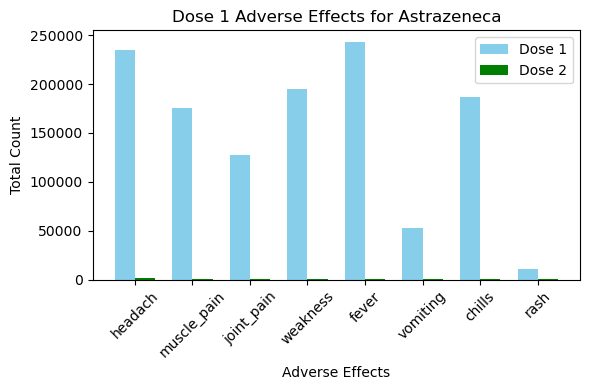

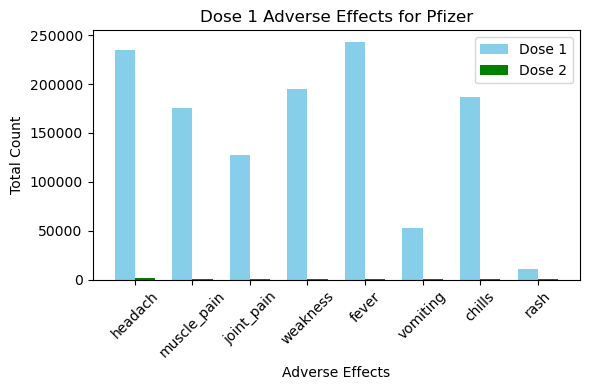

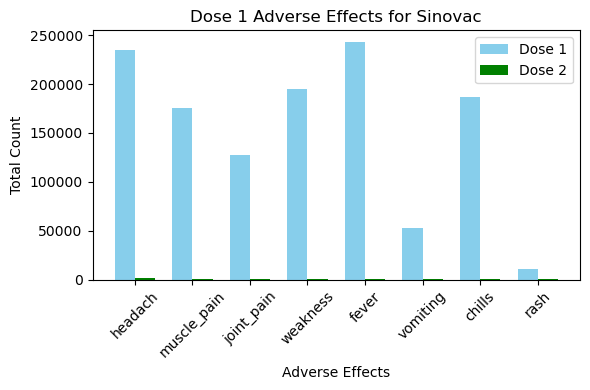

In [18]:
#Dose 1 and 2 effects for each vaccine comparison
d1_effects = ['d1_headache', 'd1_muscle_pain', 'd1_joint_pain', 'd1_weakness',
              'd1_fever', 'd1_vomiting', 'd1_chills', 'd1_rash']
d2_effects = ['d2_headache', 'd2_muscle_pain', 'd2_joint_pain', 'd2_weakness',
              'd2_fever', 'd2_vomiting', 'd2_chills', 'd2_rash']
effects = ['headach','muscle_pain','joint_pain','weakness','fever','vomiting','chills','rash']

def plot_effects(data, vaccine_name):
    total_d1_effects = data[d1_effects].sum()
    total_d2_effects = data[d2_effects].sum()
    plt.figure(figsize=(6,4))
    bar_width = 0.35
    index = range(len(d1_effects))
    plt.bar([x - bar_width/2 for x in index],total_d1_effects, width=bar_width,color='skyblue', label='Dose 1')
    plt.bar([x + bar_width/2 for x in index],total_d2_effects, width=bar_width,color='green', label='Dose 2')
    plt.title(f'Dose 1 Adverse Effects for {vaccine_name}')
    plt.xlabel('Adverse Effects')
    plt.ylabel('Total Count')
    plt.xticks(index,effects,rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
plot_effects(astrazeneca_data, 'Astrazeneca') 
plot_effects(astrazeneca_data, 'Pfizer') 
plot_effects(astrazeneca_data, 'Sinovac')

In [ ]:
#Monthly trend of each vaccine
df['month'] = pd.DatetimeIndex(df['date']).month
monthly_totals = df.groupby([df['month'], 'vaxtype']).sum().unstack()
plt.figure(figsize=(8,6))
plt.plot(monthly_totals.index, monthly_totals['daily_total']['astrazeneca'],
         label='Astrazeneca', marker='o')
plt.plot(monthly_totals.index, monthly_totals['daily_total']['pfizer'],
         label='Pfizer', marker='o')
plt.plot(monthly_totals.index, monthly_totals['daily_total']['sinovac'],
         label='Sinovac', marker='o')
plt.title('Monthly Trend of Adverse Effects Reported for Each Vaccine Type')
plt.xlabel('Month')
plt.ylabel('Monthly Total Adverse Effects')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# correlation heatmap to show relation between d1 and d2 adverse effects
adverse_effects = ['d1_headache','d1_muscle_pain','d1_joint_pain','d1_weakness','d1_fever','d1_vomiting','d1_chills',
                   'd1_rash','d2_headache','d2_muscle_pain','d2_joint_pain','d2_weakness','d2_fever','d2_vomiting',
                   'd2_chills', 'd2_rash']
adverse_effects_data = df[adverse_effects]
correlation_matrix = adverse_effects_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Different Types of Adverse Effects')
plt.xlabel('Adverse Effects')
plt.ylabel('Adverse Effects')
plt.show()

In [ ]:
#correlation by scatter plot
plt.scatter(d1_effects,d2_effects)
plt.title("Correlation by scatter plot")
plt.xlabel('Dose 1 effects')
plt.ylabel('Dose 2 effects')
plt.xticks(rotation = 45)
plt.show()


In [ ]:
#Hypothesis testing to check if there is significant difference between the vaccines.
print(total_effects)
total_effects_df = total_effects.reset_index()
total_effects_df.columns = ['vaxtype', 'daily_total']

In [ ]:
from scipy.stats import kruskal

# Example using Kruskal-Wallis H-test
group_a = total_effects_df[total_effects_df['vaxtype'] == 'astrazeneca']['daily_total']
group_b = total_effects_df[total_effects_df['vaxtype'] == 'pfizer']['daily_total']
group_c = total_effects_df[total_effects_df['vaxtype'] == 'sinovac']['daily_total']

kruskal_stat, p_value = kruskal(group_a, group_b, group_c)
print(f"Kruskal-Wallis H-test statistic: {kruskal_stat}")
print(f"P-value: {p_value}")

In [ ]:
# As p value is >0.05 we fail to reject null hypothesis. therefore,
# There might not be a significant differences between the groups regarding the total effects for the .05 significance level.
